# NLP (Natural Language Processing) with Python

In [1]:
import nltk

**We need to download `stopwords` package using nltk shell.**

In [7]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

        Yadana\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


-----

# SMS Spam Detection

Data: [
SMS Spam Collection Data Set](https://archive.ics.uci.edu/ml/datasets/sms+spam+collection)

The file we are using contains a collection of more than 5 thousand SMS phone messages. You can check out the **readme** file for more info.


In [21]:
file_path = 'smsspamcollection/SMSSpamCollection'

messages = [line.rstrip() for line in open(file_path)]

In [22]:
print(len(messages))

5574


In [23]:
messages[:5]

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham\tOk lar... Joking wif u oni...',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham\tU dun say so early hor... U c already then say...',
 "ham\tNah I don't think he goes to usf, he lives around here though"]

### A collection of texts is also sometimes called "corpus"

In [24]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print('')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

1 ham	Ok lar... Joking wif u oni...

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

3 ham	U dun say so early hor... U c already then say...

4 ham	Nah I don't think he goes to usf, he lives around here though

5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv

6 ham	Even my brother is not like to speak with me. They treat me like aids patent.

7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341.

### Analysing Data File

Due to the spacing we can tell that this is a [TSV](http://en.wikipedia.org/wiki/Tab-separated_values) ("tab separated values") file, where the first column is a label saying whether the given message is a normal message (commonly known as "ham") or "spam". The second column is the message itself.

Using these labeled ham and spam examples, we'll **train a machine learning model to learn to discriminate between ham/spam automatically**. Then, with a trained model, we'll be able to **classify arbitrary unlabeled messages** as ham or spam.

In [25]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

------

# Parsing data using pandas

In [26]:
import pandas as pd

In [28]:
messages = pd.read_csv(file_path, sep='\t', names=['label', 'message']) # as we know which to use as separator

In [33]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Exploratory Data Analysis

In [30]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [32]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


From the describe data, we can see total is 5572 messages.

However As unique messages, there are only 5169 unique ones. 

It makes sense because some messages like "Sorry, I'll cal later" can be frequently used message and duplicated in multiple times in dataset.

#### We want statistics across labels,

In [39]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

We can see that there are 4825 ham messages and 747 spam messages.

Most popular ham message is "Sorry, I'll call later" with appearing 30 times. For spam category, "Please call our customer.. " appears 4 times.

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

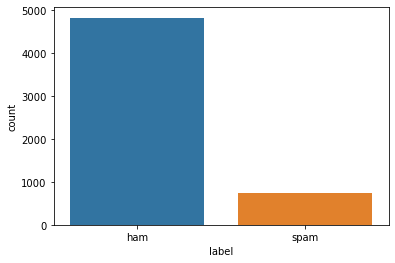

In [38]:
sns.countplot(data=messages, x='label');

------

# Feature Engineering

As we continue our analysis we want to start thinking about the features we are going to be using. This goes along with the general idea of [feature engineering](https://en.wikipedia.org/wiki/Feature_engineering). The better your domain knowledge on the data, the better your ability to engineer more features from it. Feature engineering is a very large part of spam detection in general.

#### add new column : length of the message

In [41]:
messages['length'] = messages['message'].apply(len)

messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


(0.0, 1000.0)

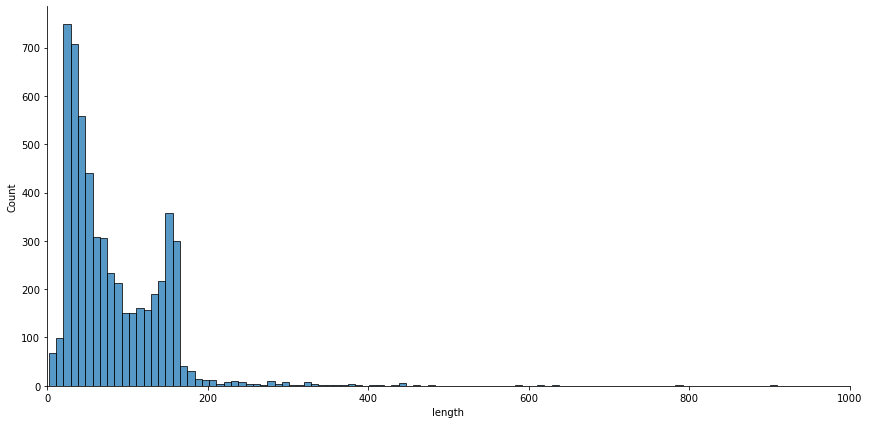

In [51]:
# let's visualize the distribution of the messages
sns.displot(data=messages, x='length', bins=100, height=6, aspect=2);
plt.xlim(0, 1000)

### Statistics of Length

In [52]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

It seems like shortest message is 2 with longest one is 910.

### Let's check which is the longest 910 message.

In [60]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

### Distributions of messages length by label type

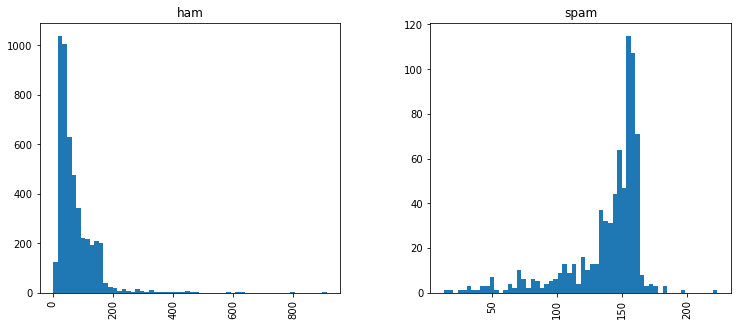

In [70]:
messages.hist(column='length', by='label', bins=60, figsize=(12, 5));

---------


# Text Pre-processing

* Our main issue with our data is that it is all in text format (strings). 
* The classification algorithms that we've learned about so far will need some sort of numerical feature vector in order to perform the classification task. 
* There are actually many methods to convert a corpus to a vector format. The simplest is the the **[bag-of-words](http://en.wikipedia.org/wiki/Bag-of-words_model) approach**, where each unique word in a text will be represented by one number.


In this section we'll convert the raw messages (sequence of characters) into vectors (sequences of numbers).

As a first step, let's write a function that will split a message into its individual words and return a list. We'll also remove very common words, ('the', 'a', etc..). To do this we will take advantage of the NLTK library. It's pretty much the standard library in Python for processing text and has a lot of useful features. We'll only use some of the basic ones here.

Let's create a function that will process the string in the message column, then we can just use **apply()** in pandas do process all the text in the DataFrame.

First removing punctuation. We can just take advantage of Python's built-in **string** library to get a quick list of all the possible punctuation:

### Remove Punctuation

In [71]:
import string

In [73]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [88]:
dummy = 'Sample message! Notice: it has punctuation.'

In [89]:
# Check characters to see if they are in punctuation
no_punc = [c for c in dummy if c not in string.punctuation]

In [90]:
# now all the punctuatoin are removed
no_punc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [91]:
# Join the characters again to form the string.
no_punc = ''.join(no_punc)
no_punc

'Sample message Notice it has punctuation'

### Remove Stopwords by using nltk

We can impot a list of english stopwords from NLTK.

In [97]:
# we an see the common stopwords from NLTK
from nltk.corpus import stopwords

stopwords.words('english')[:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [93]:
no_punc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [109]:
# check whether each words belong to common stopwords, if yes then remove
clean_mess = [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]

clean_mess

['Sample', 'message', 'Notice', 'punctuation']

We can see that `it` and `has` are removed.

## Custom Function to combine above functionalties to remove both 
* punctuation
* stopwords

In [112]:
def text_process(message):
    """
    1. remove punctuation
    2. remove stopwords
    3. returns list of clean text words
    """
    
    # 1) remove punctuation
    no_punc = [c for c in message if c not in string.punctuation]
    no_punc = ''.join(no_punc)

    # 2) remove stopwords
    clean_message = [word for word in no_punc.split() if word not in stopwords.words('english')]
    
    # 3) return list clean text words
    return clean_message

In [113]:
# test function
test_msg = 'Sample message! Notice: it has punctuation.'
text_process(test_msg)

['Sample', 'message', 'Notice', 'punctuation']

---------

## Tokenization

Now let's "tokenize" these messages. 

### Tokenization is just the term used to describe the process of converting the normal text strings in to a list of tokens (words that we actually want).

Let's see an example output on on column:

**Note:**
We may get some warnings or errors for symbols we didn't account for or that weren't in Unicode (like a British pound symbol)

In [114]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [115]:
# now the message are tokenized by using our function
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, I, dont, think, goes, usf, lives, around...
Name: message, dtype: object

-------

# Continuing Normalization

There are a lot of ways to continue normalizing this text. 
* Such as [Stemming](https://en.wikipedia.org/wiki/Stemming) 
* or distinguishing by [part of speech](http://www.nltk.org/book/ch05.html).

NLTK has lots of built-in tools and great documentation on a lot of these methods. Sometimes they don't work well for text-messages due to the way a lot of people tend to use abbreviations or shorthand, For example:
    
    'Nah dawg, IDK! Wut time u headin to da club?'
    
versus

    'No dog, I don't know! What time are you heading to the club?'
    
Some text normalization methods will have trouble with this type of shorthand. To explore those more advanced methods through the [NLTK book online](http://www.nltk.org/book/).

For now we will just focus on using what we have to convert our list of words to an actual vector that SciKit-Learn can use.

---------

# Vectorization


Currently, we have the messages as lists of tokens (also known as [lemmas](http://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

We'll do that in three steps using the **bag-of-words model**:

1. **Count how many times does a word occur in each message (Known as term frequency)**

2. **Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)**

3. **Normalize the vectors to unit length, to abstract from the original text length (L2 norm)**

# 1. Count how many times does a word occur in each message (Known as term frequency)

Let's begin the first step:

Each vector will have as many dimensions as there are unique words in the SMS corpus.  We will first use SciKit Learn's **CountVectorizer**. This model will convert a collection of text documents to a matrix of token counts.

We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message. 

For example:

<table border = “1“>
<tr>
<th></th> <th>Message 1</th> <th>Message 2</th> <th>...</th> <th>Message N</th> 
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word N Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>


Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a [Sparse Matrix](https://en.wikipedia.org/wiki/Sparse_matrix).

###  CountVectorizer as Transformer

In [117]:
from sklearn.feature_extraction.text import CountVectorizer

There are a lot of arguments and parameters that can be passed to the CountVectorizer. In this case we will just specify the **analyzer** to be our own previously defined function:

In [118]:
# Bag of Words tansformer (using our defined function)
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [119]:
# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

11617


#### Testing on randomly selected 4th message

In [122]:
message_4 = messages['message'][3]
message_4

'U dun say so early hor... U c already then say...'

In [124]:
# transform the 4th above message using our bow transformer into Vector
bow_4 = bow_transformer.transform([message_4])

In [126]:
print(bow_4)

  (0, 4221)	2
  (0, 4821)	1
  (0, 5453)	1
  (0, 6396)	1
  (0, 6414)	1
  (0, 7378)	1
  (0, 9746)	2


In [127]:
bow_4.shape

(1, 11617)

This means that there are **seven unique words** in message number 4 (after removing common stop words). 
* Two of them appear twice (index of 4221 and 9746)
* the rest only once.

Let's go ahead and check and confirm which ones appear twice:

In [130]:
# check which words appear twice in message 4
# we can get the the word from bow transformer features name

print(bow_transformer.get_feature_names()[4221]) # passing the index 
print(bow_transformer.get_feature_names()[9746] )

U
say


We can see that `U` and `say` appear twice in original message of `U dun say so early hor... U c already then say...`

### Transforming the whole Message dataframe

In [131]:
messages_bow = bow_transformer.transform(messages['message'])

In [133]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11617)
Amount of Non-Zero occurences:  56024


#### Sparsity
* basically comparing the number of Non-Zeros messages Versus the actual total number of messages
* tells you how many zeros are in your actual matrix

In [135]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.08655038742205227


-------


After the counting, the term weighting and normalization can be done with [TF-IDF](http://en.wikipedia.org/wiki/Tf%E2%80%93idf), using scikit-learn's `TfidfTransformer`.

____

# 2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

## So what is TF-IDF?
TF-IDF stands for *term frequency-inverse document frequency*, and the tf-idf weight is a weight often used in information retrieval and text mining. **This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus.** The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model.

#### Typically, the tf-idf weight is composed by two terms: 
* the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document;
* the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

**TF: Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

*TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).*

**IDF: Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

*IDF(t) = log_e(Total number of documents / Number of documents with term t in it).*

See below for a simple example.

**Example:**

Consider a document containing 100 words where in the word cat appears 3 times. 

The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.
____

Let's go ahead and see how we can do this in SciKit Learn:

In [136]:
from sklearn.feature_extraction.text import TfidfTransformer

In [139]:
tfidf_transformer = TfidfTransformer()

tfidf_transformer.fit(messages_bow) # fit on whole message bow

TfidfTransformer()

In [140]:
# test run on 4th message, bow
tfidf_4 = tfidf_transformer.transform(bow_4)
print(tfidf_4)

  (0, 9746)	0.5385626262927564
  (0, 7378)	0.4389365653379857
  (0, 6414)	0.3187216892949149
  (0, 6396)	0.29953799723697416
  (0, 5453)	0.29729957405868723
  (0, 4821)	0.26619801906087187
  (0, 4221)	0.40832589933384067


#### Example: 

We'll go ahead and check what is the IDF (inverse document frequency) of the word `"u"` and of word `"university"`?

In [141]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])

print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.2800524267409408
8.527076498901426


### tfidf transforming on whole bow messages

To transform the entire bag-of-words corpus into TF-IDF corpus at once:

In [143]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11617)


There are many ways the data can be preprocessed and vectorized. These steps involve feature engineering and building a "pipeline". We can check out SciKit Learn's documentation on dealing with text data as well as the expansive collection of available papers and books on the general topic of NLP.

--------

# Machine Learning Modelling and Training

With messages represented as vectors, we can finally train our spam/ham classifier. Now we can actually use almost any sort of classification algorithms. For a [variety of reasons](http://www.inf.ed.ac.uk/teaching/courses/inf2b/learnnotes/inf2b-learn-note07-2up.pdf), the Naive Bayes classifier algorithm is a good choice.

We'll be using scikit-learn here, choosing the [Naive Bayes](http://en.wikipedia.org/wiki/Naive_Bayes_classifier) classifier to start with:

# Using NaiveBayes

In [147]:
from sklearn.naive_bayes import MultinomialNB

In [149]:
# vectorized tfidf data, actual label
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

#### Test on single message

In [150]:
spam_detect_model.predict(tfidf_4)

array(['ham'], dtype='<U4')

It is predicted as `ham`. So what is the actual label?

In [156]:
print('predicted:', spam_detect_model.predict(tfidf_4)[0])
print('expected:', messages.label[3])

predicted: ham
expected: ham


---------

# Model Evaluation

In [157]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


We can use SciKit Learn's built-in classification report, which returns [precision, recall,](https://en.wikipedia.org/wiki/Precision_and_recall) [f1-score](https://en.wikipedia.org/wiki/F1_score), and a column for support (meaning how many cases supported that classification). Check out the links for more detailed info on each of these metrics and the figure below:

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png' width=400 />

In [159]:
from sklearn.metrics import classification_report
print (classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.84      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



There are quite a few possible metrics for evaluating model performance. Which one is the most important depends on the task and the business effects of decisions based off of the model. For example, the cost of mis-predicting "spam" as "ham" is probably much lower than mis-predicting "ham" as "spam".

In the above "evaluation",we evaluated accuracy on the same data we used for training. **You should never actually evaluate on the same dataset you train on!**

Such evaluation tells us nothing about the true predictive power of our model. If we simply remembered each example during training, the accuracy on training data would trivially be 100%, even though we wouldn't be able to classify any new messages.

A proper way is to split the data into a training/test set, where the model only ever sees the **training data** during its model fitting and parameter tuning. The **test data** is never used in any way. This is then our final evaluation on test data is representative of true predictive performance.

---------

# Train Test Split

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.3, random_state=42)

In [162]:
msg_train.shape, msg_test.shape, label_train.shape, label_test.shape

((3900,), (1672,), (3900,), (1672,))

In [163]:
msg_train.head(2)

708     Quite late lar... Ard 12 anyway i wun b drivin...
4338                        on a Tuesday night r u 4 real
Name: message, dtype: object

As we need to redo all Text Pre-Processing on the splitted data, we will use Pipeline to redo all the tasks.

## Creating a Data Pipeline

Let's run our model again and then predict off the test set. We will use SciKit Learn's [pipeline](http://scikit-learn.org/stable/modules/pipeline.html) capabilities to store a pipeline of workflow. This will allow us to set up all the transformations that we will do to the data for future use. Let's see an example of how it works:

In [164]:
from sklearn.pipeline import Pipeline

In [165]:
steps = [
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
]

pipeline = Pipeline(steps)

In [166]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000005B4D684040>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [167]:
predictions = pipeline.predict(msg_test)

In [169]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1448
        spam       1.00      0.73      0.85       224

    accuracy                           0.96      1672
   macro avg       0.98      0.87      0.91      1672
weighted avg       0.97      0.96      0.96      1672



-----------------

# Using RandomForest Classifier

In [170]:
from sklearn.ensemble import RandomForestClassifier

In [171]:
steps = [
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
]

pipeline = Pipeline(steps)

In [172]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000005B4D684040>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [173]:
predictions = pipeline.predict(msg_test)

In [174]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1448
        spam       1.00      0.84      0.91       224

    accuracy                           0.98      1672
   macro avg       0.99      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672



## More Resources

Check out the links below for more info on Natural Language Processing:

[NLTK Book Online](http://www.nltk.org/book/)

[Kaggle Walkthrough](https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words)

[SciKit Learn's Tutorial](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)